In [1]:
# Standard imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Reading / loading the data: 

df = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [3]:
# Dropping ID column:

df = df.drop("Id", axis=1)

In [4]:
# Checking some data statistics:

len(df)

150

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Dropping duplicates:

df.drop_duplicates(inplace=True)

df.duplicated().value_counts()

False    147
Name: count, dtype: int64

In [8]:
# Checking for Null values:

df.isnull().value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
False          False         False          False         False      147
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

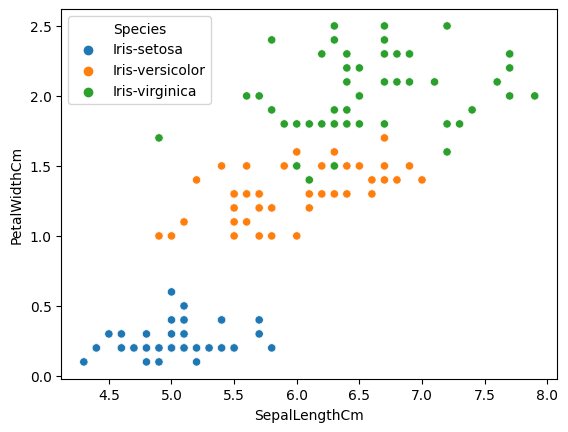

In [9]:
# Plotting

sns.scatterplot(data=df, x='SepalLengthCm', y='PetalWidthCm', hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

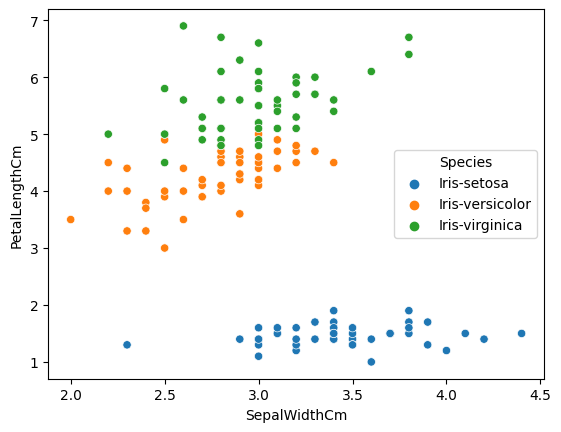

In [10]:
sns.scatterplot(data=df, x='SepalWidthCm', y='PetalLengthCm', hue='Species')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

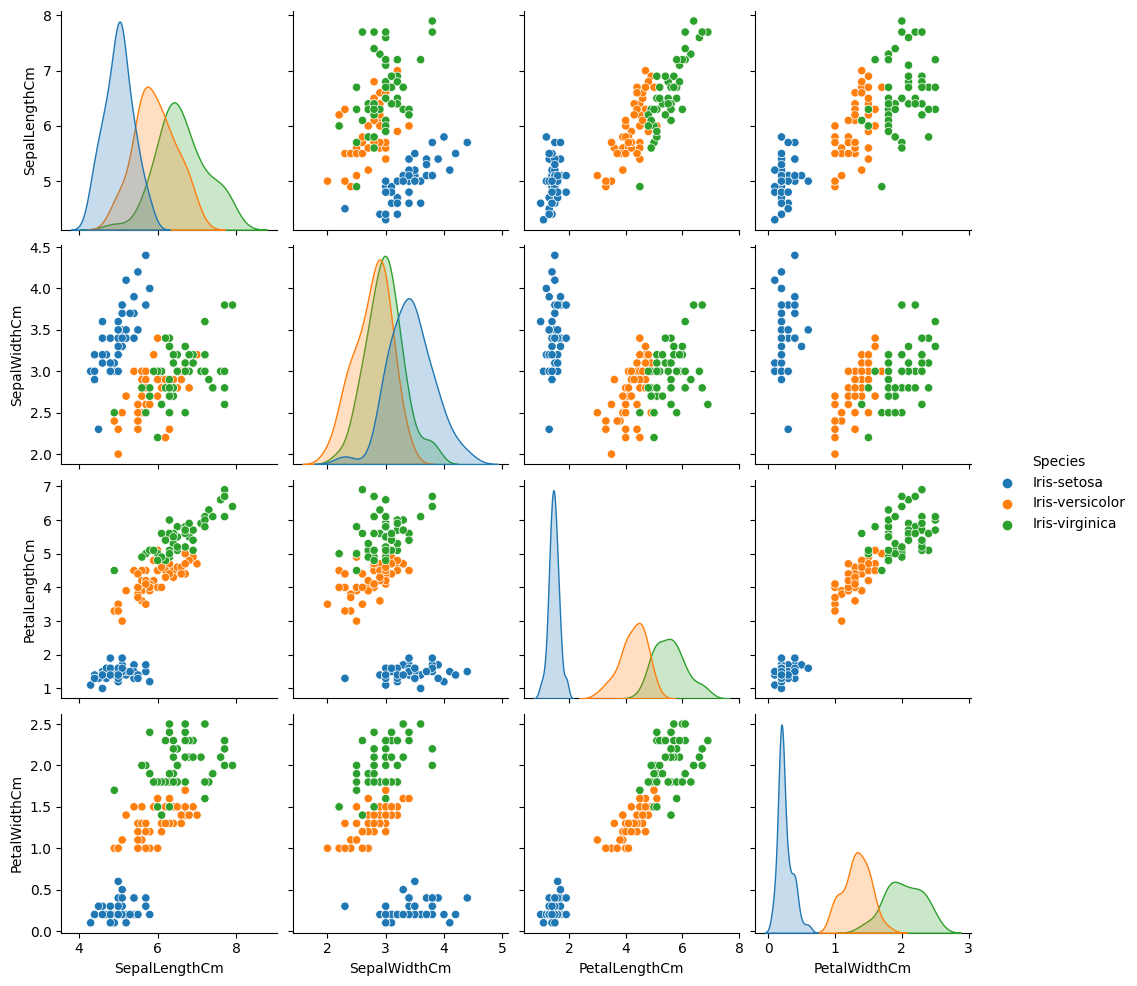

In [11]:
sns.pairplot(data=df, hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='count'>

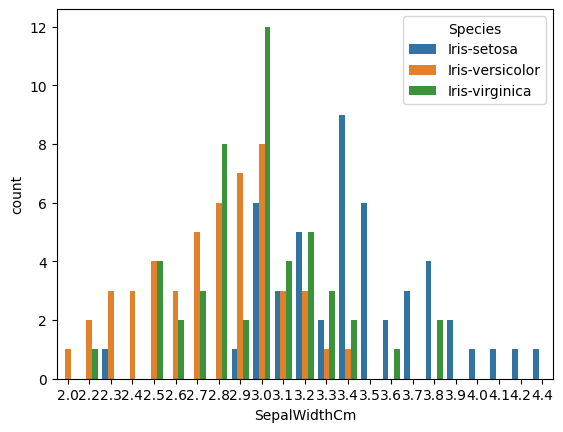

In [12]:
sns.countplot(data=df, x='SepalWidthCm', hue='Species')

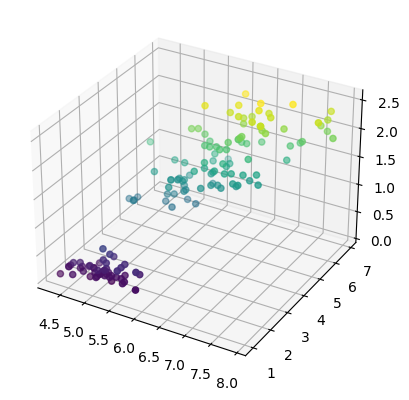

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['SepalLengthCm'],df['PetalLengthCm'], df['PetalWidthCm'], c=df['PetalWidthCm'])

In [14]:
# One hot encoding labels:

df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1,2,3], inplace=True)

/tmp/ipykernel_18/3856033648.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1,2,3], inplace=True)


<Axes: >

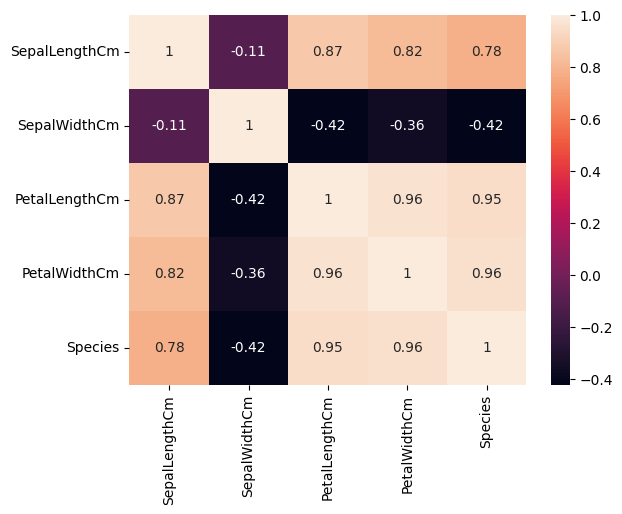

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
# Train / Test split and calling Logistic Regression:

X = df.drop('Species', axis=1)

y = df['Species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
# Scaling the data:

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
# Initiating the logistic model:

log_model = LogisticRegression(solver='saga', multi_class="ovr", max_iter=5000)

In [20]:
# Penalty Type:
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs):
C = np.logspace(0, 4, 10)

In [21]:
# Searching for best params using grid search:

grid_model = GridSearchCV(log_model, param_grid={'C':C, 'penalty':penalty})

In [22]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [23]:
grid_model.best_params_

{'C': 2.7825594022071245, 'penalty': 'l1'}

In [24]:
# Predicting labels:

y_pred = grid_model.predict(scaled_X_test)

In [25]:
# Accuracy Score:

accuracy_score(y_test, y_pred)

1.0

In [26]:
# Confusion Matrix:

confusion_matrix(y_test, y_pred)

array([[4, 0, 0],
       [0, 6, 0],
       [0, 0, 5]])

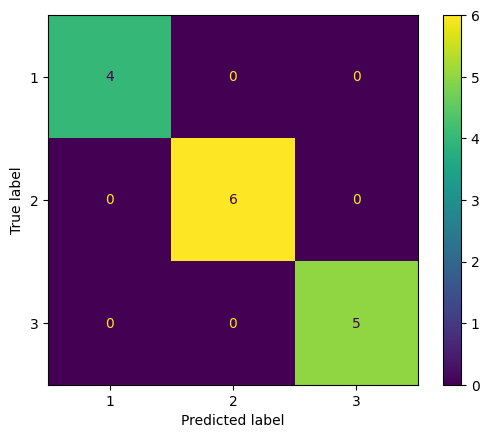

In [27]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)

In [28]:
# Classification Report:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [29]:
# Function for ROC & AUC:

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

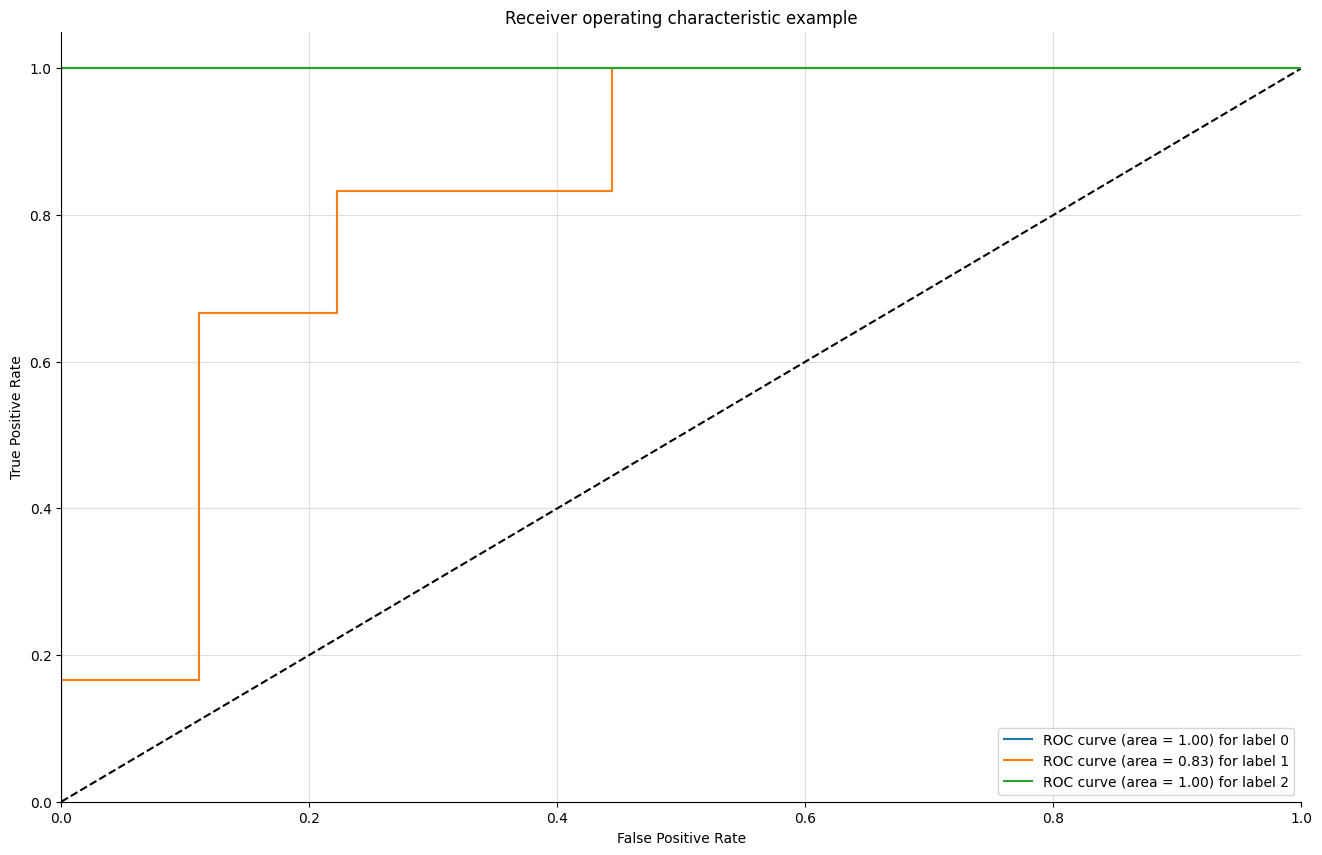

In [30]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))